In [21]:
import pandas as pd

# Load the dataset
file_path = 'bank_transactions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Convert CustomerDOB to datetime
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], format='%d/%m/%y', errors='coerce')

# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d/%m/%y', errors='coerce')

# Remove duplicates
data.drop_duplicates(inplace=True)

# Check for missing values again after conversion
missing_values_after = data.isnull().sum()

missing_values, missing_values_after


(TransactionID                 0
 CustomerID                    0
 CustomerDOB                3397
 CustGender                 1100
 CustLocation                151
 CustAccountBalance         2369
 TransactionDate               0
 TransactionTime               0
 TransactionAmount (INR)       0
 dtype: int64,
 TransactionID                  0
 CustomerID                     0
 CustomerDOB                60736
 CustGender                  1100
 CustLocation                 151
 CustAccountBalance          2369
 TransactionDate                0
 TransactionTime                0
 TransactionAmount (INR)        0
 dtype: int64)

In [ ]:
# Drop rows with missing CustomerDOB
data = data.dropna(subset=['CustomerDOB'])

# Fill missing CustGender and CustLocation with 'Unknown'
data['CustGender'].fillna('Unknown', inplace=True)
data['CustLocation'].fillna('Unknown', inplace=True)

# Impute missing CustAccountBalance with the median
data['CustAccountBalance'].fillna(data['CustAccountBalance'].median(), inplace=True)

# Check if there are any remaining missing values
missing_values_final = data.isnull().sum()

missing_values_final


<ipython-input-19-a0532b9b8f18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustGender'].fillna('Unknown', inplace=True)
<ipython-input-19-a0532b9b8f18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustLocation'].fillna('Unknown', inplace=True)


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

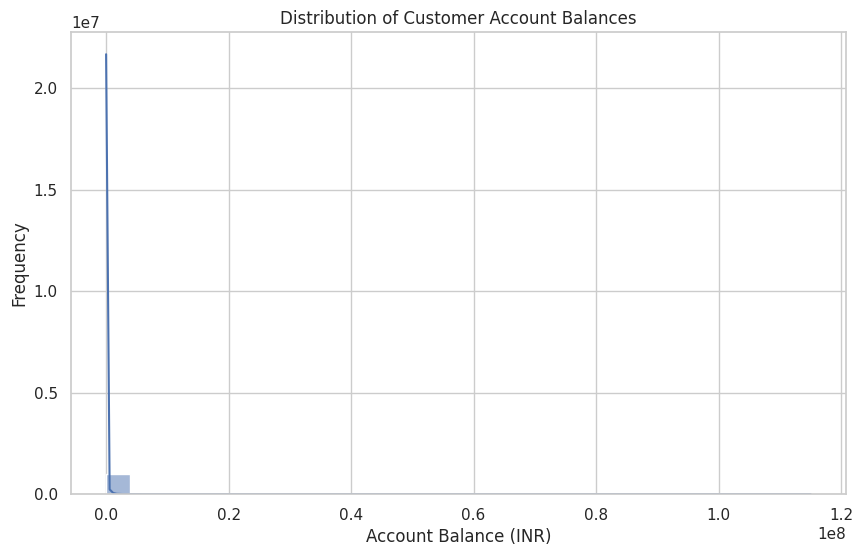

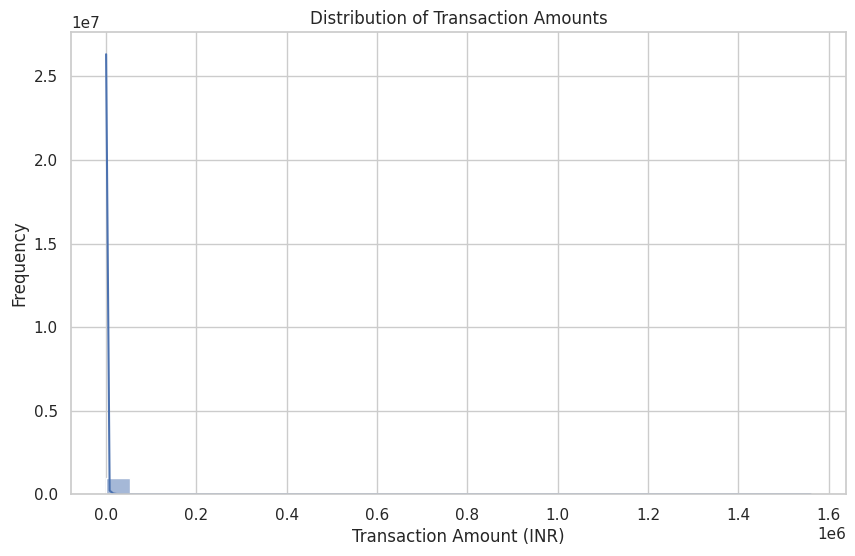

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of Customer Account Balances
plt.figure(figsize=(10, 6))
sns.histplot(data['CustAccountBalance'], kde=True, bins=30)
plt.title('Distribution of Customer Account Balances')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionAmount (INR)'], kde=True, bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()


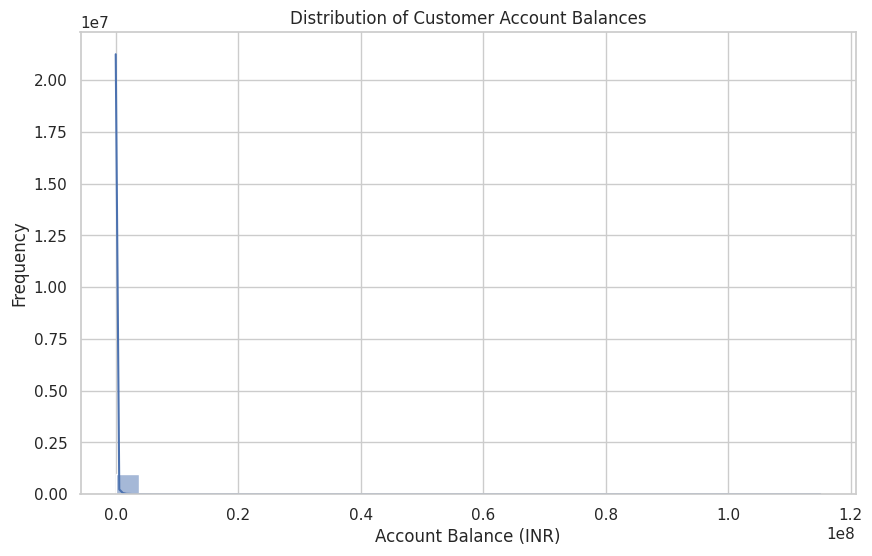

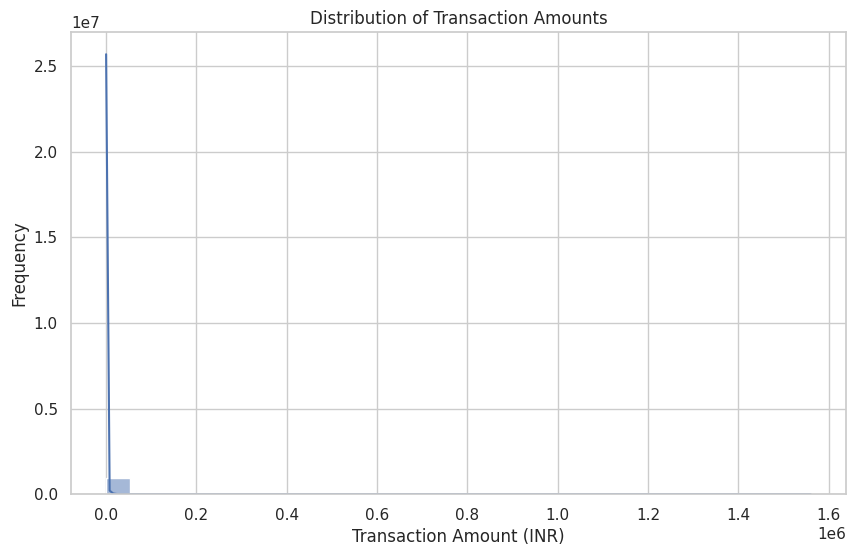

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of Customer Account Balances
plt.figure(figsize=(10, 6))
sns.histplot(data['CustAccountBalance'], kde=True, bins=30)
plt.title('Distribution of Customer Account Balances')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionAmount (INR)'], kde=True, bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'bank_transactions.csv'
data = pd.read_csv(file_path)

# Convert CustomerDOB to datetime
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], format='%d/%m/%y', errors='coerce')

# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d/%m/%y', errors='coerce')

# Drop rows with missing CustomerDOB
data = data.dropna(subset=['CustomerDOB'])

# Fill missing CustGender and CustLocation with 'Unknown'
data['CustGender'].fillna('Unknown', inplace=True)
data['CustLocation'].fillna('Unknown', inplace=True)

# Impute missing CustAccountBalance with the median
data['CustAccountBalance'].fillna(data['CustAccountBalance'].median(), inplace=True)


<ipython-input-14-c94e4b35f6f4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustGender'].fillna('Unknown', inplace=True)
<ipython-input-14-c94e4b35f6f4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustLocation'].fillna('Unknown', inplace=True)


In [ ]:
# Drop non-numeric and non-relevant columns
data_ml = data.drop(columns=['TransactionID', 'CustomerID', 'CustLocation', 'TransactionDate', 'TransactionTime'])

# Convert categorical variable CustGender to numeric
data_ml = pd.get_dummies(data_ml, columns=['CustGender'], drop_first=True)


In [22]:
data_ml['CustGender_M'] = data_ml['CustGender_M'].astype(int)
data_ml['CustGender_Unknown'] = data_ml['CustGender_Unknown'].astype(int)

In [23]:
data_ml

,CustomerDOB,CustAccountBalance,TransactionAmount (INR),CustGender_M,CustGender_Unknown
0,1994-01-10,17819.05,25.0,0,0
1,2057-04-04,2270.69,27999.0,1,0
2,1996-11-26,17874.44,459.0,0,0
3,1973-09-14,866503.21,2060.0,0,0
4,1988-03-24,6714.43,1762.5,0,0
...,...,...,...,...,...
1048562,1990-04-08,7635.19,799.0,1,0
1048563,1992-02-20,27311.42,460.0,1,0
1048564,1989-05-18,221757.06,770.0,1,0
1048565,1978-08-30,10117.87,1000.0,1,0


In [24]:
data_ml.dtypes

CustomerDOB                datetime64[ns]
CustAccountBalance                float64
TransactionAmount (INR)           float64
CustGender_M                        int64
CustGender_Unknown                  int64
dtype: object

In [25]:
data_ml['year'] = data_ml['CustomerDOB'].dt.year
data_ml['month'] = data_ml['CustomerDOB'].dt.month
data_ml['day_of_week'] = data_ml['CustomerDOB'].dt.dayofweek  # Monday=0, Sunday=6
data_ml['day_of_month'] = data_ml['CustomerDOB'].dt.day

data_ml.drop(columns=['CustomerDOB'], inplace=True)

In [26]:
data_ml

,CustAccountBalance,TransactionAmount (INR),CustGender_M,CustGender_Unknown,year,month,day_of_week,day_of_month
0,17819.05,25.0,0,0,1994,1,0,10
1,2270.69,27999.0,1,0,2057,4,2,4
2,17874.44,459.0,0,0,1996,11,1,26
3,866503.21,2060.0,0,0,1973,9,4,14
4,6714.43,1762.5,0,0,1988,3,3,24
...,...,...,...,...,...,...,...,...
1048562,7635.19,799.0,1,0,1990,4,6,8
1048563,27311.42,460.0,1,0,1992,2,3,20
1048564,221757.06,770.0,1,0,1989,5,3,18
1048565,10117.87,1000.0,1,0,1978,8,2,30


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into features and target variable
X = data_ml.drop(columns=['TransactionAmount (INR)'])
y = data_ml['TransactionAmount (INR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 38358796.140206546
R-squared: 0.008457600879295146
